# Inference example
You can use module ```utils.inference``` for predicting labels.

### Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from utils.attentions import calculate_mask
from utils.inference import load_vit_model, predict
from utils.datasets import load_data, load_labels
import warnings
warnings.simplefilter("ignore")

### Load model weights and data

In [2]:
model_dir = "saved_models/fruits360_1"
model = load_vit_model(model_dir)

In [3]:
_, ds2 = load_data("fruits-360", batch_size=9)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [4]:
x, y = next(ds2)
labels = load_labels("fruits-360")

samples = tf.unstack(x)

### Predictions

In [5]:
predictions = predict(model, samples, labels)

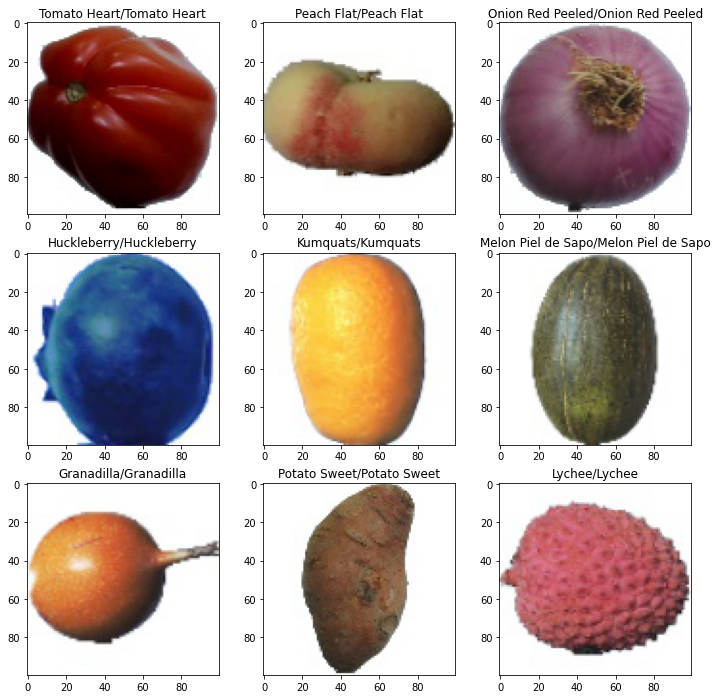

In [6]:
_, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
for i, img, ax in zip(range(len(samples)), samples, axs):
    ax.imshow(img)
    ax.set_title(f"{predictions[i]}/{labels[int(y[i])]}")
plt.show()

### Model evaluation

In [7]:
model_compiled = load_vit_model(model_dir, compiled=True)

In [8]:
_, ds2_ = load_data("fruits-360", batch_size=64)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [10]:
model_compiled.evaluate(ds2_)

355/355 [==============================] - 57s 159ms/step - loss: 0.0842 - accuracy: 0.9816


[0.08495763689279556, 0.9817084074020386]